Original Texts:
Text 1: Pentagon
Text 2: Moon

EMBEDDING VECTOR DETAILS

Text 1: 'Pentagon'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [ 0.02238687  0.02661555 -0.03286526  0.03582953 -0.0374675  -0.08406902
  0.00085677  0.02958269  0.08359972  0.05431068]
Mean: 0.000892
Std: 0.051023
Min: -0.165895
Max: 0.198709

Text 2: 'Moon'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [ 9.2148031e-05  3.4934804e-02  4.1344851e-02  6.0127750e-02
 -9.0935603e-02 -4.2241585e-02  6.7362666e-02 -4.3818843e-02
  2.1339612e-02 -1.8132750e-02]
Mean: 0.000873
Std: 0.051024
Min: -0.138981
Max: 0.194545

Text 3: 'Harry Potter'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [-0.06422769 -0.00430152 -0.04282691  0.03793846 -0.10789489 -0.01337648
  0.0463733  -0.02006128  0.08278275 -0.0571144 ]
Mean: 0.001121
Std: 0.051019
Min: -0.139833
Max: 0.179643

Text 4: 'Wand'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [-0.04456525  0.00198564 -0.00982396 -

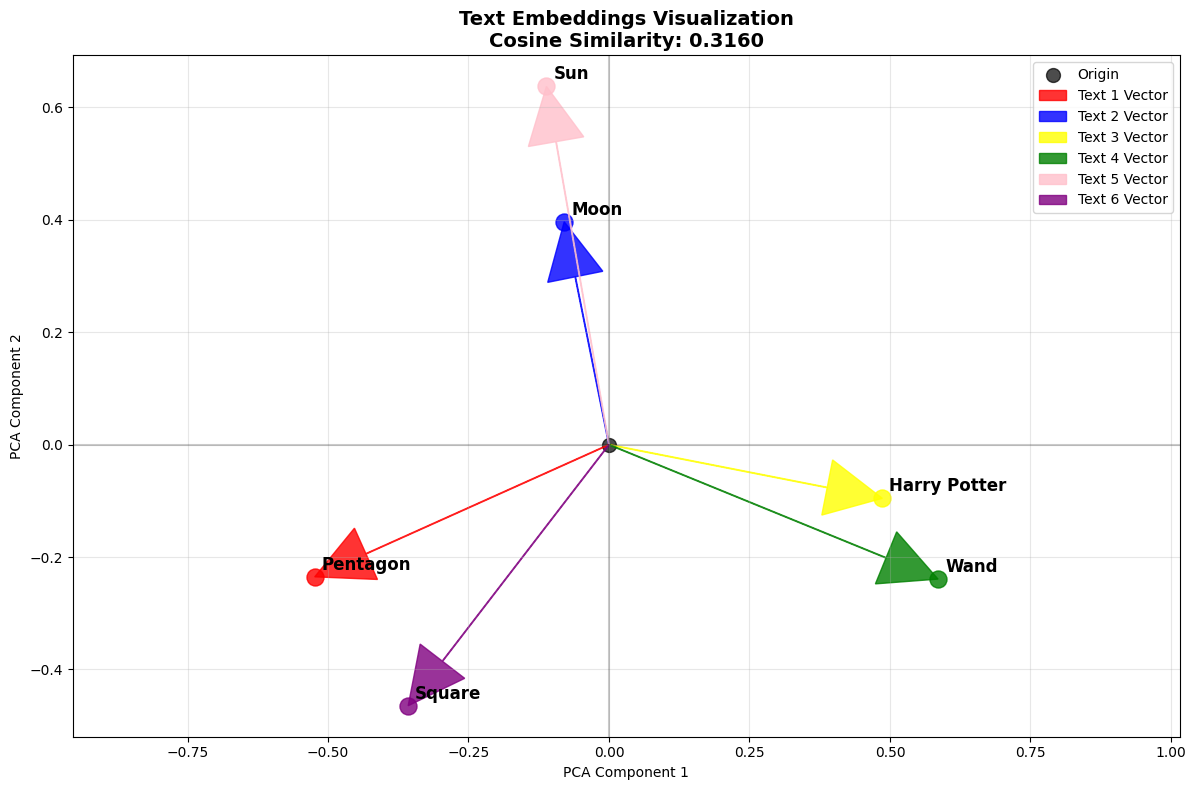


VECTOR INFORMATION:
Pentagon magnitude: 0.5740
Moon magnitude: 0.4046
Harry Potter magnitude: 0.4957
Wand magnitude: 0.6326
Sun magnitude: 0.6474
Square magnitude: 0.5861

Cosine Similarity between texts: 0.3160


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import seaborn as sns

def get_embeddings_sentence_transformers(texts):
    """Get embeddings using Sentence Transformers"""
    model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight model
    embeddings = model.encode(texts)
    return embeddings

def visualize_embeddings(embeddings, texts):
    """Visualize embeddings using PCA for dimensionality reduction"""
    # Reduce dimensions to 2D for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot origin point
    plt.scatter(0, 0, color='black', s=100, marker='o', label='Origin', alpha=0.7)
    
    # Plot the vectors from origin to each point
    colors = ['red', 'blue','yellow','green','pink','purple']
    for i, (x, y) in enumerate(embeddings_2d):
        # Draw vector arrow from origin to point
        plt.arrow(0, 0, x, y, 
                 head_width=0.1, head_length=0.1, 
                 fc=colors[i], ec=colors[i], 
                 length_includes_head=True, 
                 alpha=0.8, 
                 label=f'Text {i+1} Vector')
        
        # Plot the endpoint
        plt.scatter(x, y, color=colors[i], s=150, alpha=0.8)
        
        # Add text label near the endpoint
        plt.annotate(f'{texts[i]}', (x, y), xytext=(5, 5), 
                    textcoords='offset points', fontsize=12, fontweight='bold')
    
    # Calculate and display cosine similarity
    similarity = np.dot(embeddings[0], embeddings[1]) / (
        np.linalg.norm(embeddings[0]) * np.linalg.norm(embeddings[1])
    )
    
    # Calculate vector magnitudes
    magnitudes = [np.linalg.norm(vec) for vec in embeddings_2d]
    
    plt.title(f'Text Embeddings Visualization\nCosine Similarity: {similarity:.4f}', 
              fontsize=14, fontweight='bold')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.2)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.2)
    plt.legend()
    
    # Set equal aspect ratio for proper vector representation
    plt.axis('equal')
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print vector information
    print("\nVECTOR INFORMATION:")
    for i, mag in enumerate(magnitudes):
        print(f"{texts[i]} magnitude: {mag:.4f}")
    
    return embeddings_2d, similarity

def display_vector_details(embeddings, texts):
    """Display detailed information about the vectors"""
    print("=" * 60)
    print("EMBEDDING VECTOR DETAILS")
    print("=" * 60)
    
    for i, (text, embedding) in enumerate(zip(texts, embeddings)):
        print(f"\nText {i+1}: '{text}'")
        print(f"Vector shape: {embedding.shape}")
        print(f"Vector dtype: {embedding.dtype}")
        print(f"First 10 values: {embedding[:10]}")
        print(f"Mean: {np.mean(embedding):.6f}")
        print(f"Std: {np.std(embedding):.6f}")
        print(f"Min: {np.min(embedding):.6f}")
        print(f"Max: {np.max(embedding):.6f}")

# Main execution
if __name__ == "__main__":
    # Example texts
    text1 = "Pentagon"
    text2 = "Moon"
    text3 = "Harry Potter"
    text4 = "Wand"
    text5 = "Sun"
    text6 = "Square"
    print("Original Texts:")
    print(f"Text 1: {text1}")
    print(f"Text 2: {text2}")
    print()
    
    # Get embeddings
    texts = [text1, text2,text3,text4,text5,text6]
    embeddings = get_embeddings_sentence_transformers(texts)
    
    # Display vector details
    display_vector_details(embeddings, texts)
    
    # Visualize embeddings
    embeddings_2d, similarity = visualize_embeddings(embeddings, texts)
    
    print(f"\nCosine Similarity between texts: {similarity:.4f}")

In [ ]:
pip install sentence-transformers scikit-learn matplotlib seaborn numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 41.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/7 [sympy]
    Found existing installation: pyparsing 3.2.3━━━━━━━━━━━━━━ 1/7 [sympy]
    Uninstalling pyparsing-3.2.3:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/7 [sympy]
      Successfully uninstalled pyparsing-3.2.3━━━━━━━━━━━━━━━━ 1/7 [sympy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [sentence-transformers]ence-transformers]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
